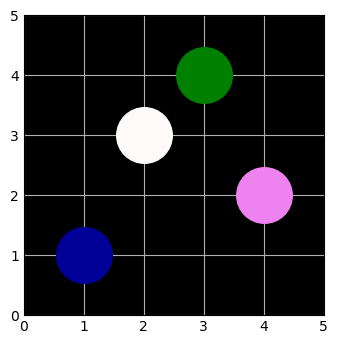

In [8]:
import matplotlib.pyplot as plt
from colorsys import rgb_to_hls, hls_to_rgb
from matplotlib.colors import to_rgb

class pera:
    
    ás = None
    perustærð = 40
    
    def __init__(self, x, y, litur):  # x og y eru á bilinu [0, 5]
                                      # litur er litanafn eða (r,g,b)
       self._RGB = to_rgb(litur)      # (r,g,b)
       self.birta = 50                # prósent
       h = pera.ás.plot(x, y, 'o', c=litur, ms=pera.perustærð)
       self.mynd = h[0]               # litaður hringur sem táknar peruna

    def stilla_birtu(self, birta):    # birta í prósentum
       (r,g,b) = self._RGB
       (hue, _, saturation) = rgb_to_hls(r, g, b)
       self.birta = max(0, min(100, birta))
       self.mynd.set_color(hls_to_rgb(hue, self.birta/100, saturation))

    def breyta_lit(self, litur):
       self._RGB = to_rgb(litur)
       self.stilla_birtu(self.birta)

    @classmethod
    def undirbúa(cls, figure):
        ás = figure.add_axes([0, 0, 1, 1])  # hnitakerfi fyllir upp í mynd
        ás.axis([0, 5, 0, 5])               # 5x5 hnitakerfi
        ás.set_facecolor('black')
        ás.tick_params(length=0)
        ás.grid()
        cls.ás = ás                         # gefa klasabreytunni ás gildi

figure = plt.figure(figsize = (3,3))
pera.undirbúa(figure)
p1 = pera(1, 1, 'red')
p2 = pera(3, 4, 'green')
p3 = pera(4, 2, 'violet')
p4 = pera(2, 3, 'snow')
p1.stilla_birtu(30)
p4.stilla_birtu(90)
p1.breyta_lit('blue')          

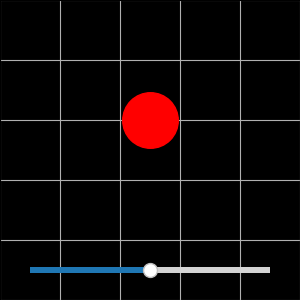

In [2]:
%matplotlib widget

def búa_til_sleða(p):
    from matplotlib.widgets import Slider
    def nota_dimmer(gildi):
        p.stilla_birtu(gildi)
    sleðaás = plt.axes([0.1, 0.08, 0.8, 0.04], xticks=[], yticks=[])
    sleði = Slider(sleðaás, '', valmin=0, valmax=100, valinit=50)
    sleði.on_changed(nota_dimmer)
    return sleði
    
f = plt.figure(figsize = (3,3))
pera.undirbúa(f)
p = pera(2.5, 3, 'red')
sleði = búa_til_sleða(p)

In [3]:
class prufa():
    def __init__(self):
        print('self=', self)

x = prufa()

self= <__main__.prufa object at 0x11394ec40>
